In [1]:
from ptycho import tf_helper
import tensorflow as tf
from ptycho.model_manager import ModelManager
import os

def load_diffraction_to_obj(name_prefix: str) -> tf.keras.Model:
    """
    Load the diffraction_to_obj model given a name prefix.

    Args:
        name_prefix (str): The prefix of the model's save directory.

    Returns:
        tf.keras.Model: The loaded diffraction_to_obj model.

    Raises:
        FileNotFoundError: If the model directory doesn't exist.
        ValueError: If the model couldn't be loaded.
    """
    # Construct the base path
    base_path = os.path.join(name_prefix, "wts.h5")
    
    # Define the model name
    model_name = "diffraction_to_obj"

    # Check if the directory exists
    full_path = f"{base_path}_{model_name}"
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"Model directory not found: {full_path}")

    try:
        # Load the model
        loaded_model = ModelManager.load_model(base_path, model_name)
        print(f"Successfully loaded model from {full_path}")
        return loaded_model
    except Exception as e:
        raise ValueError(f"Failed to load model: {str(e)}")

2024-08-13 21:42:51.937674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 21:42:51.937704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 21:42:51.938544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 21:42:51.942711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 21:42:52.486517: W tensorflow/compiler/tf2

1 items had no tests:
    __main__
0 tests in 1 items.
0 passed and 0 failed.
Test passed.


2024-08-13 21:42:53.435421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-13 21:42:53.435680: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-13 21:42:53.435852: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw, obj = test_generic_loader.test_generic_loader(False);

ln: failed to create symbolic link './test_generic_loader.py': File exists
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
raw diffraction shape (64, 64, 1087)
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
Train data written to train_data.npz

In [12]:
from ptycho import probe
from ptycho import params as p

from ptycho.xpp import *
from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

In [18]:
import dill
def load_object(filename):
    """
    Load a Python object from a file using dill.

    :param filename: The name of the file from which to load the object.
    :return: The loaded object.
    """
    with open(filename, 'rb') as file:
        return dill.load(file)

In [20]:
test_data = load_object('test.dill')
loaded_model = load_diffraction_to_obj('tmp/08-13-2024-21.41.41_')

34/34 [==============================] - 0s 5ms/step
obj_tensor_full shape: (1087, 64, 64, 1)
global_offsets shape: (1087, 1, 2, 1)
PADDING SIZE: 23
PADDING SIZE: 23


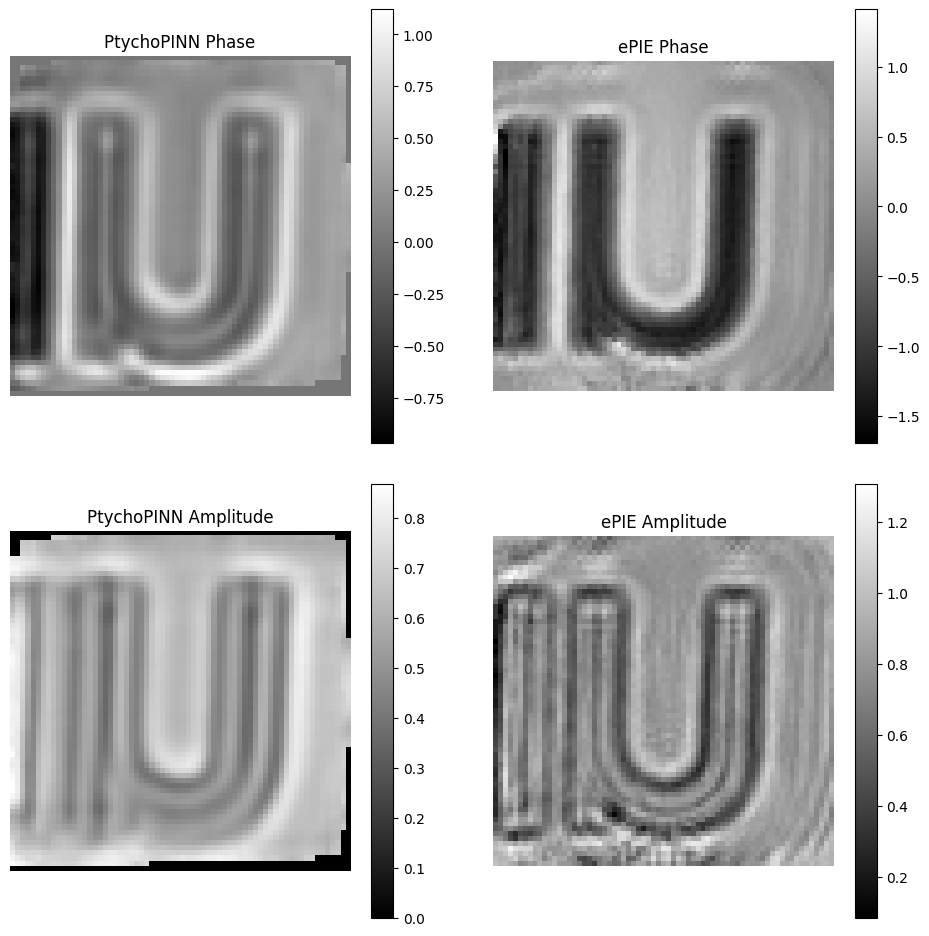

In [25]:
from ptycho.model_manager import ModelManager
import os

from ptycho.nbutils import reconstruct_image, crop_to_non_uniform_region_with_buffer, mk_epie_comparison2x2, probeshow

# Step 3: Use the loaded model in the reconstruct_image function
obj_tensor_full, global_offsets = reconstruct_image(test_data, diffraction_to_obj=loaded_model)

# Step 4: Print some information about the results
print(f"obj_tensor_full shape: {obj_tensor_full.shape}")
print(f"global_offsets shape: {global_offsets.shape}")

obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

In [10]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

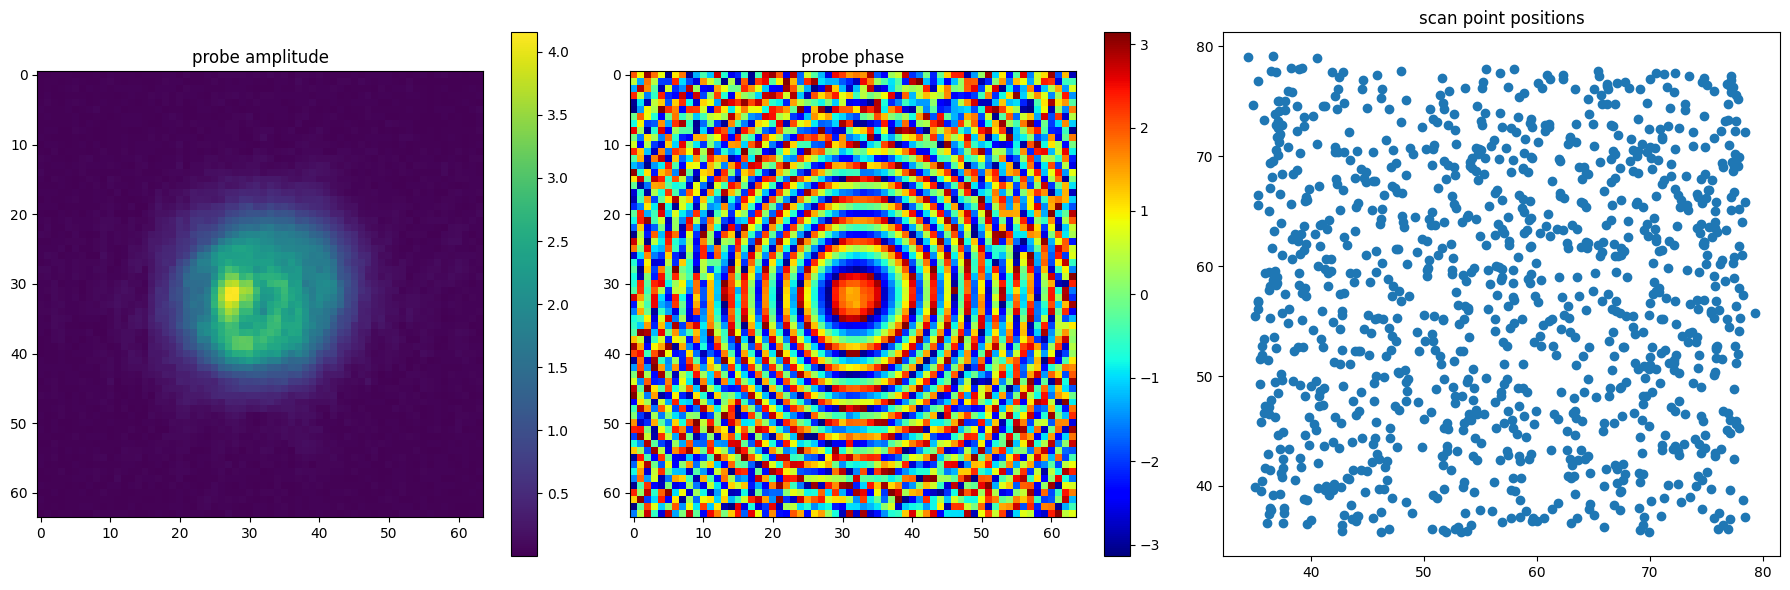

In [26]:
# Note the randomized scan point positions
probeshow(probeGuess, test_data)

In [14]:
loaded_mod = ModelManager.load_model('tmp/08-13-2024-16.00.27_//wts.h5')

DEBUG: Setting intensity_scale to 1474.2617 in params
input shape (1, 64, 64, 1)


Reconstruction for a single solution region:

In [27]:
# i = 200
# from ptycho import evaluation
# evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
#                      np.absolute(p.get('probe')[:, :, 0, 0]), 0,
#                     crop = False);

NameError: name 'pred_amp' is not defined